# Correlation Between Likes And Views In youtube Videos

#### We are starting by looking at the correlation between likes and views. First we'll plot only for canada. 

          views     likes
views  1.000000  0.828964
likes  0.828964  1.000000


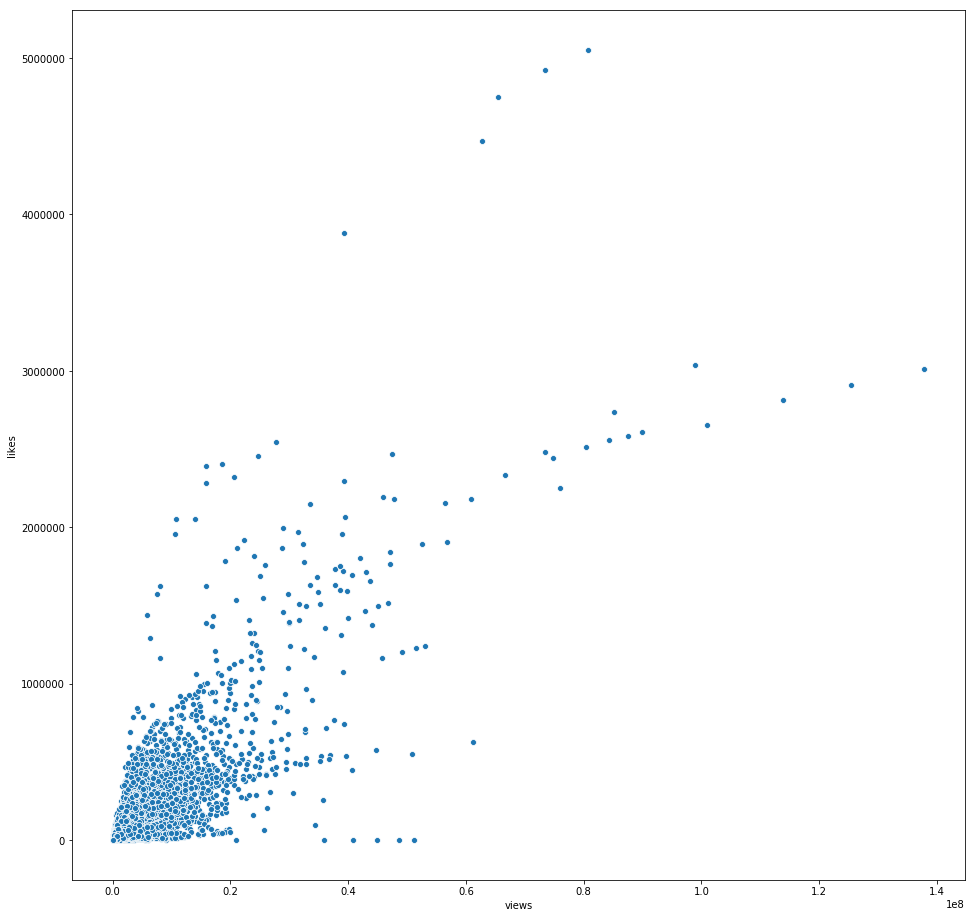

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
CAvideos = pd.read_csv("../input/youtube-new/CAvideos.csv")
df=CAvideos[['views', 'likes']]
corr = df.corr()
print(corr)
matplotlib.pyplot.figure(figsize=(16,16))
sns.scatterplot(x=df["views"], y=df["likes"])

### Observations:

1. Initially the likes grows proportionally to veiws. However as the views surpases a limit/threshold, the likes become rarer. 
2. Most videos can cross a threshold of 0.2 in views and 1000000 likes. 
3. The curve follows the realtionship of:
                   likes=K*Sqrt(views)
  Where K can be in terms of millions/billions, depending on the reach of videos.

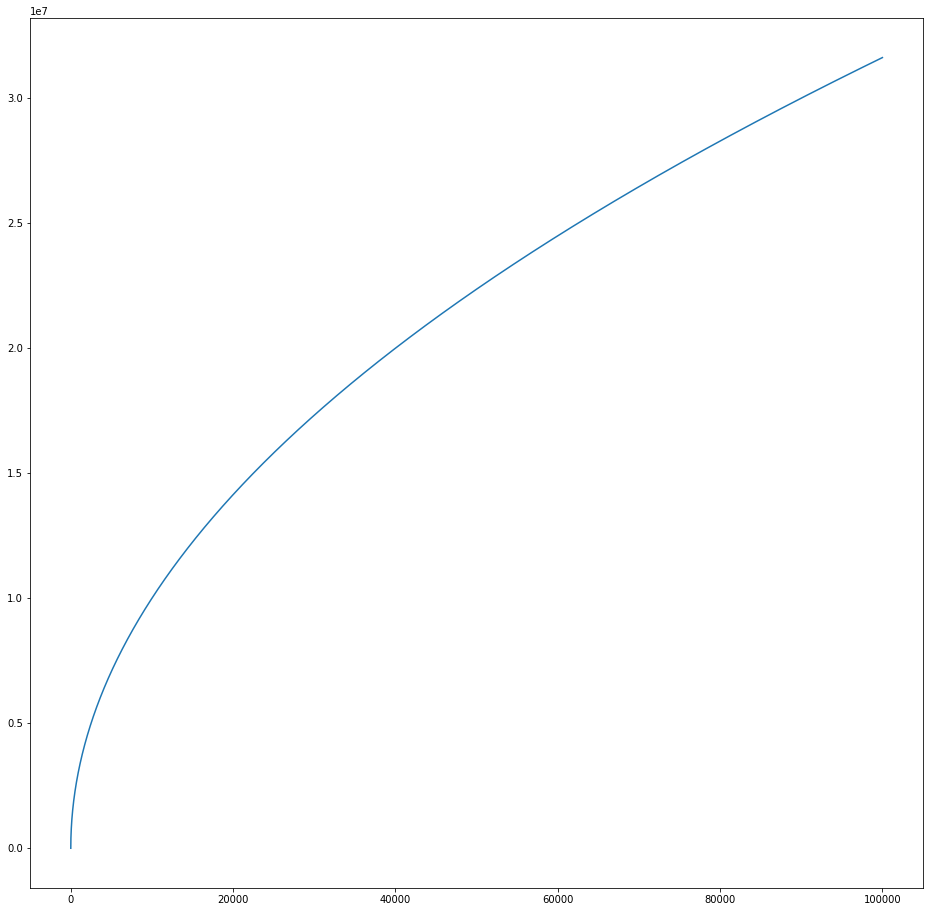

In [2]:
from matplotlib import pyplot as plt
import numpy as np
K = 100000
x = np.arange(K)
y = K * np.sqrt(x)
plt.figure(figsize=(16,16))
plt.plot(x,y)


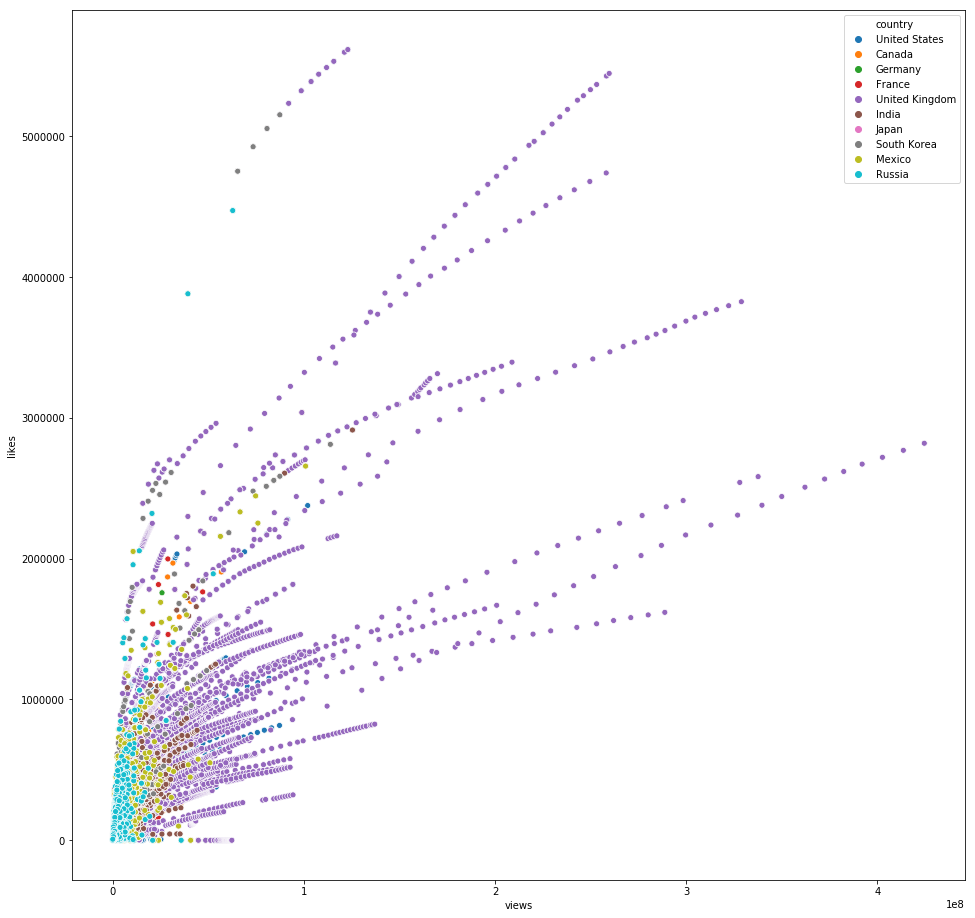

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
col_list = ['views', 'likes']
us = pd.read_csv('../input/youtube-new/USvideos.csv', usecols=col_list) #USA, remaking the dataframe in the same format as the others
ca = pd.read_csv('../input/youtube-new/CAvideos.csv', usecols=col_list) #Canada
de = pd.read_csv('../input/youtube-new/DEvideos.csv', usecols=col_list) #Germany
fr = pd.read_csv('../input/youtube-new/FRvideos.csv', usecols=col_list) #France
gb = pd.read_csv('../input/youtube-new/GBvideos.csv', usecols=col_list) #United Kingdom 
ind = pd.read_csv('../input/youtube-new/INvideos.csv', usecols=col_list) #India
jp = pd.read_csv('../input/youtube-new/JPvideos.csv', usecols=col_list) #Japan
kr = pd.read_csv('../input/youtube-new/KRvideos.csv', usecols=col_list) #South Korea
mx = pd.read_csv('../input/youtube-new/MXvideos.csv', usecols=col_list) #Mexico
ru = pd.read_csv('../input/youtube-new/RUvideos.csv', usecols=col_list) #Russia

df_list = [us, ca, de, fr, gb, ind, jp, kr, mx, ru]
df_name_list = ['United States', 'Canada', 'Germany', 'France', 'United Kingdom', 'India',
                'Japan', 'South Korea', 'Mexico', 'Russia']

Master_df = pd.DataFrame(columns=['views', 'likes', 'country'])

for i in range (len(df_list)):
    add = np.full((len(df_list[i])),df_name_list[i])
    df_list[i]['country'] = add
    Master_df = pd.merge(Master_df,df_list[i], how='outer')
    
matplotlib.pyplot.figure(figsize=(16,16))
sns.scatterplot(x=Master_df["views"], y=Master_df["likes"], hue=Master_df["country"])
    
    

### Hence, the trend is similar for most countries. 
###### One explaination for this observation can be less veiwed videos are watched by supporters/binge watchers, who have a tendency to like, while more viewed data is also shown to people incative on youtube, who have less tendency to give a like. 
### Hence Like/View ratio should fall as the views increases.


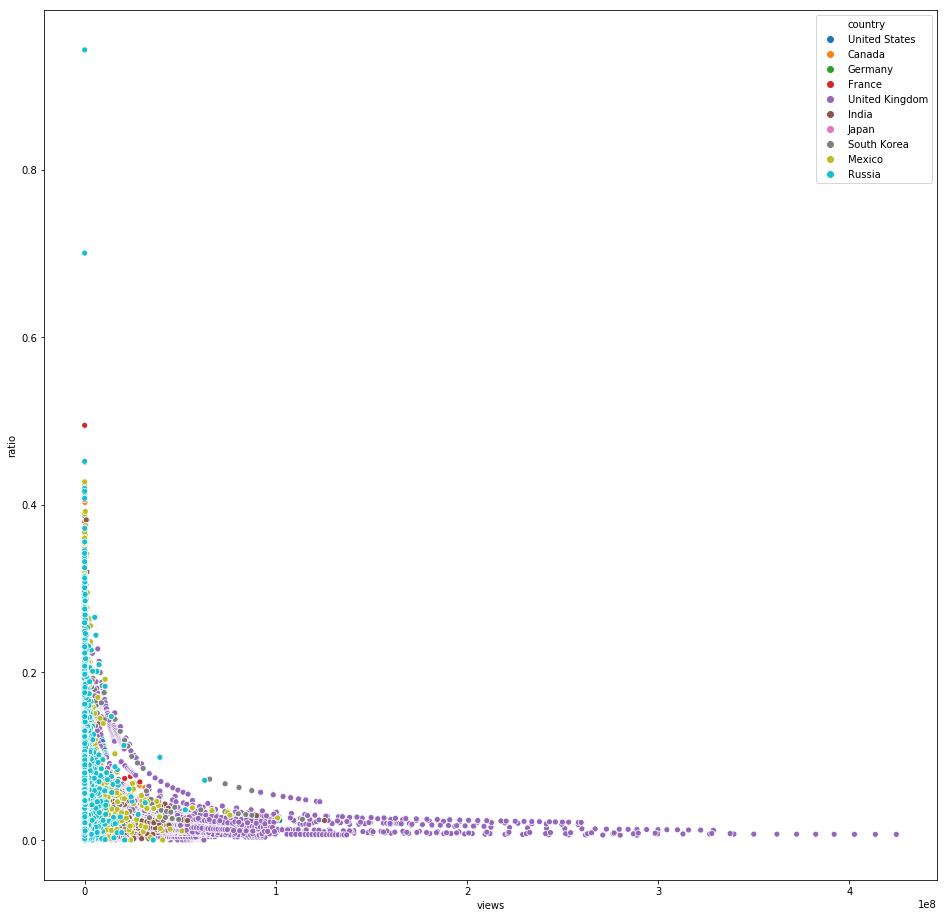

In [4]:
# for i in range(0,len(Master_df)):
views = Master_df["views"]
likes = Master_df["likes"]
ratio = likes/views
Master_df["ratio"] = ratio
matplotlib.pyplot.figure(figsize=(16,16))
sns.scatterplot(x=Master_df["views"], y=Master_df["ratio"], hue=Master_df["country"])

### This graph clearly proves the above explaination to be correct.